In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib


In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedianHouseValue")

print("Shape:", X.shape)
print("Features:", X.columns.tolist())


Shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedianHouseValue, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DECISION TREE REGRESSOR

In [7]:
dt_reg = DecisionTreeRegressor(
    criterion="squared_error",
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    splitter="best",
    random_state=2
)

In [8]:
dt_reg.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [9]:
y_pred = dt_reg.predict(X_test_scaled)

In [10]:
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

Decision Tree Performance:
MAE: 0.49256708293183643
MSE: 0.4816287925742836
RMSE: 0.6939948073107489
R² score: 0.6424498354725977


In [11]:
for name, score in zip(data.feature_names, dt_reg.feature_importances_):
    print(f"{name}: {score:.4f}")

MedInc: 0.7216
HouseAge: 0.0427
AveRooms: 0.0307
AveBedrms: 0.0010
Population: 0.0065
AveOccup: 0.1406
Latitude: 0.0378
Longitude: 0.0191


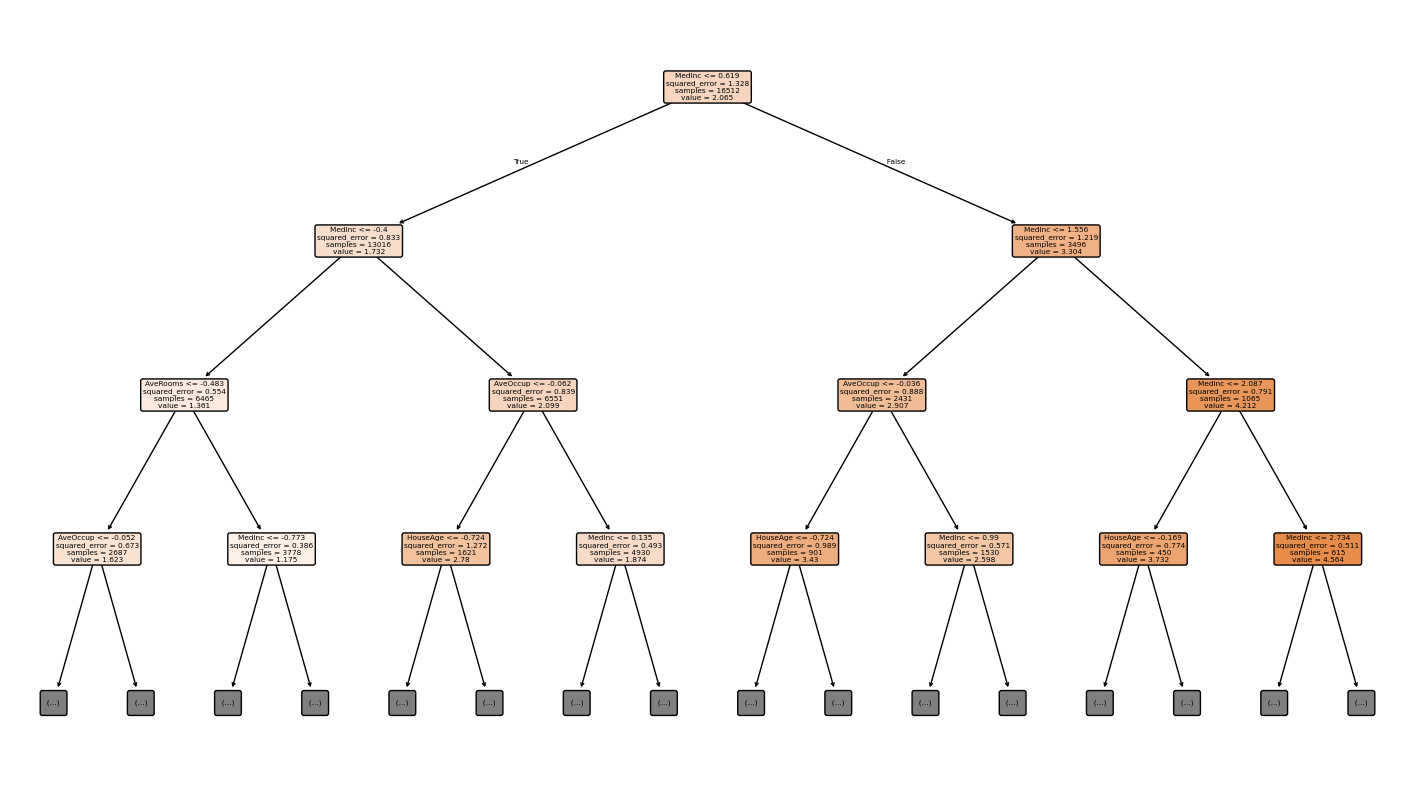

In [12]:
plt.figure(figsize=(18, 10))
plot_tree(
    dt_reg,
    feature_names=data.feature_names,
    filled=True,
    rounded=True,
    max_depth=3
)
plt.show()


In [13]:
joblib.dump(dt_reg, "decision_tree_regressor.pkl")
print("Decision Tree Regressor saved!")

Decision Tree Regressor saved!


In [14]:
loaded_dt_reg = joblib.load("decision_tree_regressor.pkl")

In [15]:
def predict_house_value_dt(features_list):
    # features_list = [MedInc, HouseAge, AveRooms, AveBedrms,Population, AveOccup, Latitude, Longitude]
    scaled = scaler.transform(features_list)
    pred = loaded_dt_reg.predict(scaled)[0]
    return float(pred)

In [16]:
test = pd.DataFrame([[8.3, 29, 6.5, 1.0, 400, 3.5, 34.2, -118.4]], columns=data.feature_names)

In [17]:
test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3,29,6.5,1.0,400,3.5,34.2,-118.4


In [18]:
print(predict_house_value_dt(test))

4.602128356164382


# RANDOM FOREST REGRESSOR

In [19]:
rf_reg = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    oob_score=True,
    min_samples_split=3,
    min_samples_leaf=1,
    bootstrap=True,
    max_features="sqrt",
    random_state=42
)

In [20]:
rf_reg.fit(X_train_scaled, y_train)

,n_estimators,150
,criterion,'squared_error'
,max_depth,10
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [21]:
print("OOB Score (R²):", rf_reg.oob_score_)

OOB Score (R²): 0.7762158390087175


In [22]:
rf_pred = rf_reg.predict(X_test_scaled)

In [23]:
print("Random Forest Regression Performance:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R² score:", r2_score(y_test, rf_pred))

Random Forest Regression Performance:
MAE: 0.38528029581082945
MSE: 0.3053517119941828
RMSE: 0.5525863841918138
R² score: 0.7733138953784517


In [24]:
imp = rf_reg.feature_importances_
for name, score in zip(data.feature_names, imp):
    print(f"{name}: {score:.4f}")

MedInc: 0.4113
HouseAge: 0.0484
AveRooms: 0.1239
AveBedrms: 0.0272
Population: 0.0178
AveOccup: 0.1177
Latitude: 0.1299
Longitude: 0.1238


In [25]:
joblib.dump(rf_reg, "random_forest_regressor.pkl")
print("Random Forest Regressor saved!")

Random Forest Regressor saved!


In [26]:
loaded_rf_reg = joblib.load("random_forest_regressor.pkl")

In [27]:
def predict_house_value_rf(features_list):
    scaled = scaler.transform(features_list)
    pred = loaded_rf_reg.predict(scaled)[0]
    return float(pred)


In [28]:
test_rf = pd.DataFrame([[8.3, 29, 6.5, 1.0, 400, 3.5, 34.2, -118.4]], columns=data.feature_names)

In [29]:
print(predict_house_value_rf(test_rf))

3.974783955328119


# XGBoost Regression

In [30]:
# !pip install xgboost

In [31]:
import xgboost as xgb

In [38]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,       # L2 regularization
    reg_alpha=0.0,        # L1 regularization
    objective='reg:squarederror',
    random_state=20,
    tree_method="hist"
)

In [39]:
xgb_reg.fit(X_train_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [40]:
y_train_pred = xgb_reg.predict(X_train_scaled)
y_test_pred = xgb_reg.predict(X_test_scaled)

In [41]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [42]:
print("=== XGBoost Regression Results ===")
print("Train RMSE:", rmse(y_train, y_train_pred))
print("Test RMSE :", rmse(y_test, y_test_pred))
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test R²   :", r2_score(y_test, y_test_pred))

=== XGBoost Regression Results ===
Train RMSE: 0.28013117282830974
Test RMSE : 0.44780249840283926
Train R²  : 0.9408916918152241
Test R²   : 0.851133298746094


In [43]:
import matplotlib.pyplot as plt

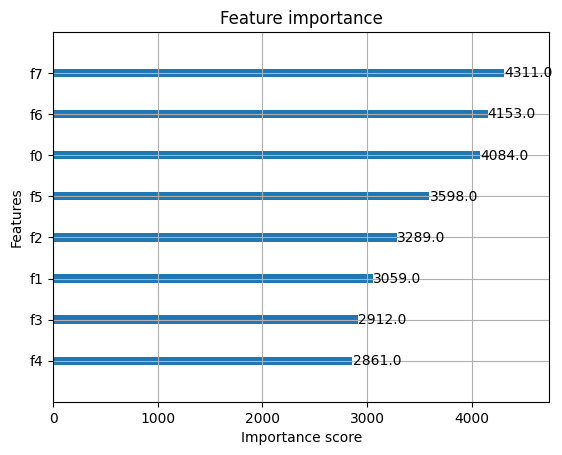

In [44]:
xgb.plot_importance(xgb_reg, max_num_features=10)
plt.show()

In [45]:
joblib.dump(xgb_reg, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [46]:
loaded_model = joblib.load("xgb_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [47]:
def predict_price(sample):
    scaled = loaded_scaler.transform(sample)
    pred = loaded_model.predict(scaled)
    return pred[0]

In [48]:
test_xgb = pd.DataFrame([[8.3, 29, 6.5, 1.0, 400, 3.5, 34.2, -118.4]], columns=data.feature_names)

In [49]:
price = predict_price(test_xgb)
print("Predicted House Price:", price)

Predicted House Price: 4.25035
